<font size="+5">#09. Cluster Analysis con k-Means</font>

- Book + Private Lessons [Here ↗](https://sotastica.com/reservar)
- Subscribe to my [Blog ↗](https://blog.pythonassembly.com/)
- Let's keep in touch on [LinkedIn ↗](www.linkedin.com/in/jsulopz) 😄

# Load the Data

> - Simply execute the following lines of code to load the data
> - This dataset contains **statistics** (columns)
> - About **Car Models** (rows)

In [1]:
import seaborn as sns

df = sns.load_dataset(name='mpg', index_col='name')
df.sample(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
name,,,,,,,,
amc hornet,18.0,6,199.0,97.0,2774,15.5,70,usa
chevrolet bel air,15.0,8,350.0,145.0,4440,14.0,75,usa
mazda glc deluxe,32.8,4,78.0,52.0,1985,19.4,78,japan
plymouth satellite sebring,18.0,6,225.0,105.0,3613,16.5,74,usa
volkswagen rabbit custom diesel,43.1,4,90.0,48.0,1985,21.5,78,europe
datsun 610,22.0,4,108.0,94.0,2379,16.5,73,japan
fiat strada custom,37.3,4,91.0,69.0,2130,14.7,79,europe
vw rabbit,41.5,4,98.0,76.0,2144,14.7,80,europe
honda civic cvcc,33.0,4,91.0,53.0,1795,17.5,75,japan


# Data `preprocessing`

> - Do you need to *transform* the data
> - To get a **truthful insight** of the model?

In [2]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [3]:
df = df.dropna()

In [4]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [5]:
dfsel = df[['mpg', 'horsepower']].copy()
dfsel

,mpg,horsepower
name,,
chevrolet chevelle malibu,18.0,130.0
buick skylark 320,15.0,165.0
plymouth satellite,18.0,150.0
amc rebel sst,16.0,150.0
ford torino,17.0,140.0
...,...,...
ford mustang gl,27.0,86.0
vw pickup,44.0,52.0
dodge rampage,32.0,84.0


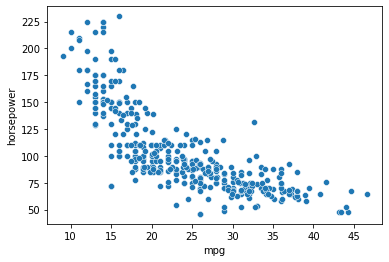

In [6]:
sns.scatterplot(x=dfsel.mpg, y=dfsel.horsepower);

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
scaler = MinMaxScaler()

In [10]:
import pandas as pd

dfnorm = pd.DataFrame(scaler.fit_transform(dfsel), columns=dfsel.columns)
dfnorm

,mpg,horsepower
0,0.239362,0.456522
1,0.159574,0.646739
2,0.239362,0.565217
3,0.186170,0.565217
4,0.212766,0.510870
...,...,...
387,0.478723,0.217391
388,0.930851,0.032609
389,0.611702,0.206522
390,0.505319,0.179348


# `KMeans()` Model in Python

## Build the Model

> 1. **Necesity**: Build Model
> 2. **Google**: How do you search for the solution?
> 3. **Solution**: Find the `function()` that makes it happen

## Code Thinking

> Which function computes the Model?
> - `fit()`
>
> How could can you **import the function in Python**?

In [11]:
from sklearn.cluster import KMeans

In [12]:
model = KMeans(n_clusters=3)

### Separate Variables for the Model

> Regarding their role:
> 1. **Target Variable `y`**
>
> - [ ] What would you like **to predict**?
>
> Total number of accients? Or Alcohol?
>
> 2. **Explanatory Variable `X`**
>
> - [ ] Which variable will you use **to explain** the target?

### Data Visualization to Analyize Patterns

> - Visualize the 2 variables with a `scatterplot()`
> - And decide *how many `clusters`* you'd like to calculate

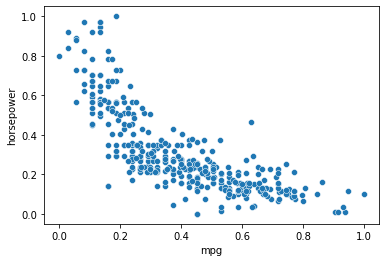

In [13]:
sns.scatterplot(x=dfnorm.mpg, y=dfnorm.horsepower);

### Finally `fit()` the Model

In [14]:
dfnorm

,mpg,horsepower
0,0.239362,0.456522
1,0.159574,0.646739
2,0.239362,0.565217
3,0.186170,0.565217
4,0.212766,0.510870
...,...,...
387,0.478723,0.217391
388,0.930851,0.032609
389,0.611702,0.206522
390,0.505319,0.179348


In [15]:
model.fit(X=dfnorm)

KMeans(n_clusters=3)

## `predict()` the *cluster* for every row

> - `model.` + `↹`

In [16]:
X

NameError: name 'X' is not defined

In [17]:
sns.scatterplot(y=0, x=X)

NameError: name 'X' is not defined

In [18]:
X

NameError: name 'X' is not defined

In [19]:
pred = model.predict(X=dfnorm)

> - Create a `dfsel` DataFrame
> - That contains the **columns you used for the model**

In [20]:
dfsel

,mpg,horsepower
name,,
chevrolet chevelle malibu,18.0,130.0
buick skylark 320,15.0,165.0
plymouth satellite,18.0,150.0
amc rebel sst,16.0,150.0
ford torino,17.0,140.0
...,...,...
ford mustang gl,27.0,86.0
vw pickup,44.0,52.0
dodge rampage,32.0,84.0


> - Add a **new column**
> - That **contains the `cluster` prediction** for every USA State

In [21]:
dfsel['cluster'] = pred

In [22]:
dfsel

,mpg,horsepower,cluster
name,,,
chevrolet chevelle malibu,18.0,130.0,1
buick skylark 320,15.0,165.0,1
plymouth satellite,18.0,150.0,1
amc rebel sst,16.0,150.0,1
ford torino,17.0,140.0,1
...,...,...,...
ford mustang gl,27.0,86.0,0
vw pickup,44.0,52.0,2
dodge rampage,32.0,84.0,2


## Model Visualization

> - You may `hue=` the points with the `cluster` column

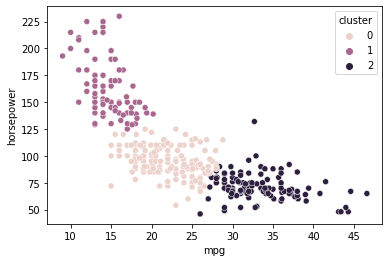

In [23]:
sns.scatterplot(x=dfsel.mpg, y=dfsel.horsepower, hue=dfsel.cluster);

## Model Interpretation

In [24]:
%%HTML

<iframe width="560" height="315" src="https://www.youtube.com/embed/4b5d3muPQmA" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

> - Can you put a **`nickname` to each group**?
> - Observe the `centroids` within `model.` + `↹`

In [25]:
centroids = model.cluster_centers_
centroids

array([[0.34639843, 0.26521132],
       [0.14790491, 0.62805013],
       [0.64440333, 0.13516068]])

In [33]:
dfnorm.columns

Index(['mpg', 'horsepower'], dtype='object')

In [35]:
dfcent = pd.DataFrame(centroids, columns=dfnorm.columns)

## Model Visualization with Centroids

> - I want to see the `centroid`
> - with a **big `marker="X"`** in the plot

In [37]:
dfcent

,mpg,horsepower
0,0.346398,0.265211
1,0.147905,0.628050
2,0.644403,0.135161


In [38]:
dfcent.index

RangeIndex(start=0, stop=3, step=1)

<AxesSubplot:xlabel='mpg', ylabel='horsepower'>

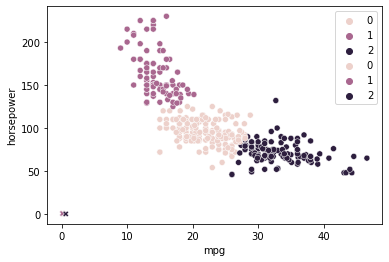

In [40]:
sns.scatterplot(x=dfsel.mpg, y=dfsel.horsepower, hue=dfsel.cluster)
sns.scatterplot(x=dfcent.mpg, y=dfcent.horsepower, hue=dfcent.index, marker='X')

In [41]:
dfcent

,mpg,horsepower
0,0.346398,0.265211
1,0.147905,0.628050
2,0.644403,0.135161


<AxesSubplot:xlabel='mpg', ylabel='horsepower'>

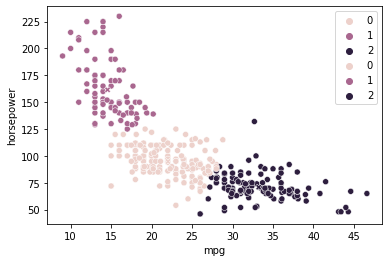

In [45]:
sns.scatterplot(x=dfsel.mpg, y=dfsel.horsepower, hue=dfsel.cluster)
sns.scatterplot(x=dfcent.mpg, y=dfcent.horsepower, hue=dfcent.index, marker='X')

In [46]:
dfcent = pd.DataFrame(scaler.inverse_transform(centroids), columns=dfnorm.columns)

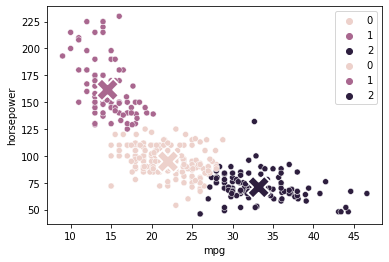

In [50]:
sns.scatterplot(x=dfsel.mpg, y=dfsel.horsepower, hue=dfsel.cluster)
sns.scatterplot(x=dfcent.mpg, y=dfcent.horsepower, hue=dfcent.index, marker='X', s=500);

# Achieved Goals

_Double click on **this cell** and place an `X` inside the square brackets (i.e., [X]) if you think you understand the goal:_

- [X] Understand how the **machine optimizes a model**
    - No more than to find the best numbers for a mathematical equation
- [X] **Residual Sum of Squares (RSS)** as a fundamental measure for the **error**. We see it on ↓
    - Neural Networks
    - Linear Regression
    - Variance
- [X] Understand the necessity to **Scale** the Data
    - For all algorithms that involves **distance calculation**.
- [X] Understand that programming is not an end itself, but a tool to achieve the end
    - We need to understand the problem and design the solution before coding
    - But we won't need how to design the solution if we don't know how to code first
    - Solution? Apply the discipline
- [X] There is **not a unique way to group data**. The same way it is not a unique way ↓
    - To predict a number **Regression Mathematical Equations**
    - To predict a category **Classification Mathematical Equations**